### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук
#### Кафедра математического моделирования и искусственного интеллекта


## ОТЧЕТ ПО ТЕМЕ № 1, задание № 2

### Дисциплина: Глубокое обучение



##### Студент:  Матюхин Григорий Васильевич
##### Группа:   НПИмд-01-25

In [1]:
import tensorflow as tf
tf.config.list_logical_devices("GPU")

W0000 00:00:1758919562.226860  498628 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758919562.226877  498628 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758919562.226879  498628 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758919562.226880  498628 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
2025-09-26 23:46:02.229746: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other o

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

I0000 00:00:1758919563.984459  498628 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15030 MB memory:  -> device: 0, name: AMD Radeon RX 9070 XT, pci bus id: 0000:03:00.0


In [2]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.california_housing.load_data(
    version="large", path="california_housing.npz", test_split=0.2, seed=113
)

In [3]:
x_train

array([[-118.27  ,   34.09  ,   52.    , ..., 1048.    ,  491.    ,
           3.7847],
       [-118.36  ,   33.96  ,   21.    , ..., 1286.    ,  557.    ,
           2.7284],
       [-122.39  ,   37.76  ,   52.    , ...,  712.    ,  398.    ,
           3.9722],
       ...,
       [-122.34  ,   37.57  ,   52.    , ...,  876.    ,  359.    ,
           8.2598],
       [-122.18  ,   37.89  ,   18.    , ..., 1634.    ,  734.    ,
           8.1489],
       [-118.43  ,   34.2   ,   29.    , ..., 1942.    ,  679.    ,
           3.1118]], dtype=float32)

In [4]:
# AveRooms has index 2 in dataset
x_train = x_train[:, 2]
x_test = x_test[:, 2]

In [5]:

model = keras.Sequential(
    [
        keras.layers.Input(shape=(1,)),
        keras.layers.BatchNormalization(axis=-1),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(4, activation="relu"),
        keras.layers.Dense(1, activation="linear"),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.mean_absolute_percentage_error,
)

history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20


I0000 00:00:1758919564.871614  498919 service.cc:152] XLA service 0x7fb5e40049d0 initialized for platform ROCM (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758919564.871630  498919 service.cc:160]   StreamExecutor device (0): AMD Radeon RX 9070 XT, AMDGPU ISA version: gfx1201
2025-09-26 23:46:04.886591: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


143/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.9998

I0000 00:00:1758919566.759602  498919 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 99.9845 - val_loss: 99.9163
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 99.3517 - val_loss: 98.1720
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 94.5578 - val_loss: 89.0018
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 79.2646 - val_loss: 70.9431
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 65.2653 - val_loss: 64.0551
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 60.9814 - val_loss: 61.4153
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 58.4593 - val_loss: 59.1095
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 55.7921 - val_loss: 56.3396
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 52.8968 - val_loss: 53.2384
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 50.2885 - val_loss: 50.5779
Epoch 11/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 48.3329 - val_loss: 48.7004
Epoch 12/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 

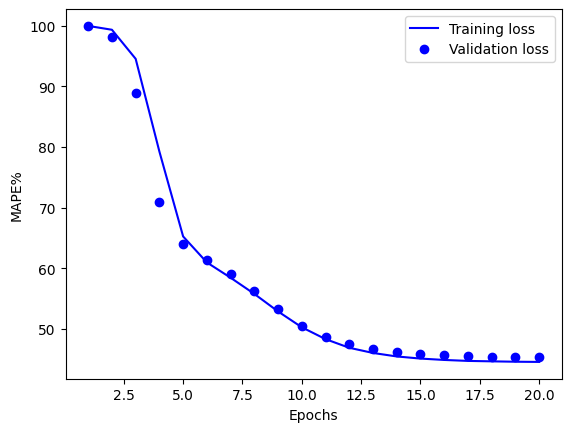

In [6]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "bo", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("MAPE%")
plt.legend()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


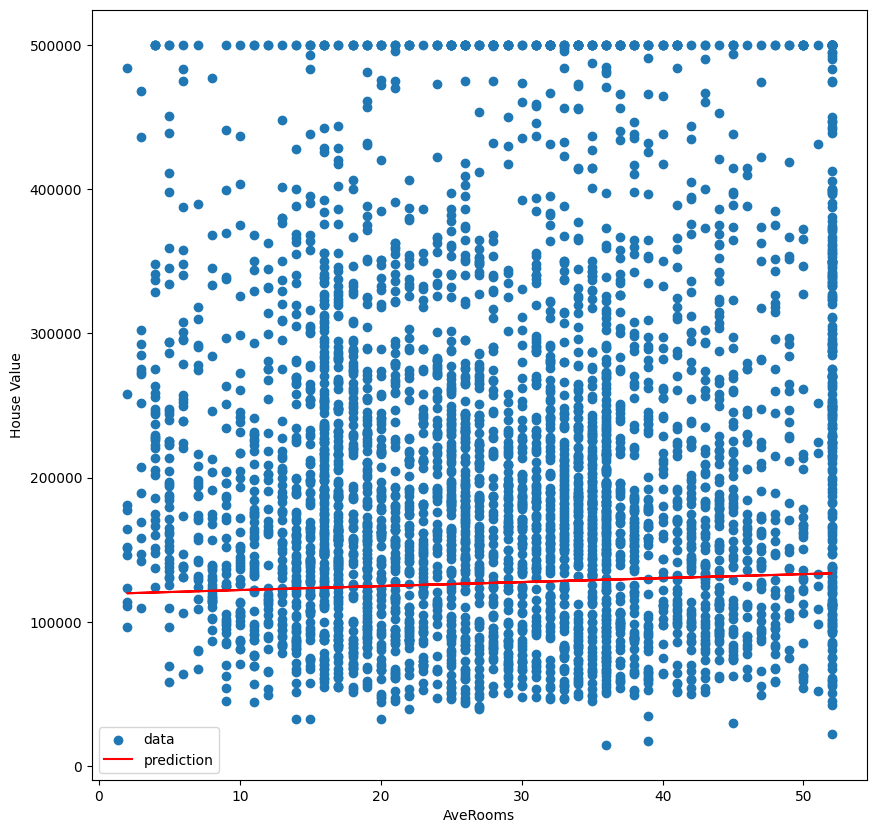

In [7]:
y_pred = model.predict(x_test)

plt.figure(figsize=(10,10))
plt.scatter(x_test, y_test, label="data")
plt.plot(x_test, y_pred, color="red", label="prediction")
plt.xlabel("AveRooms")
plt.ylabel("House Value")

plt.legend()
plt.show()